In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [159]:
data=load_digits()

In [160]:
data.target

array([0, 1, 2, ..., 8, 9, 8])

In [161]:
x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,train_size=0.30,random_state=100)

In [162]:
y_test.shape

(1258,)

<h2>Manual Testing of model accuracies

In [163]:
lr=LogisticRegression(max_iter=200)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [164]:
lr.score(x_test,y_test)

0.9443561208267091

In [165]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [166]:
svm.score(x_test,y_test)

0.9721780604133545

In [167]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [168]:
rf.score(x_test,y_test)

0.9507154213036566

In [169]:
y_pred=rf.predict(x_test)

In [170]:
from sklearn.metrics import accuracy_score

In [171]:
accuracy_score(y_pred,y_test)

0.9507154213036566

<h2>Using K-Fold 

In [172]:
from sklearn.model_selection import StratifiedKFold

In [173]:
folds=StratifiedKFold(n_splits=5)

In [174]:
from sklearn.model_selection import cross_val_score

In [ ]:
#accuracy of Logistic Regression Model
cross_val_score(lr,data.data,data.target)

In [176]:
#accuracy of Support vector Model
cross_val_score(svm,data.data,data.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [198]:
#accuracy of Random Forest Model
cross_val_score(rf,data.data,data.target)

array([0.92777778, 0.91666667, 0.96100279, 0.96935933, 0.93871866])

In [183]:
#We Use SVM for Final Classification as it has more Accuracy

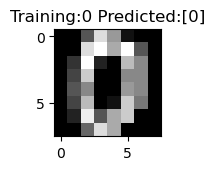

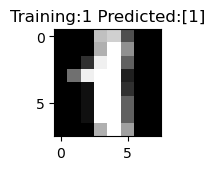

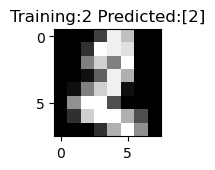

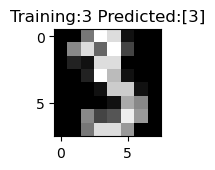

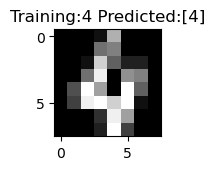

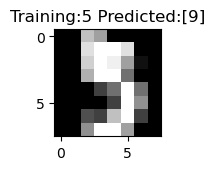

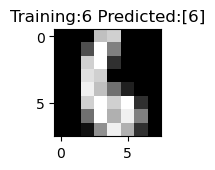

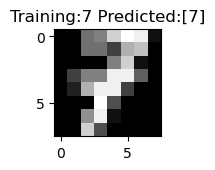

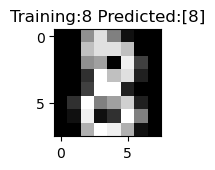

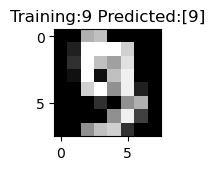

In [182]:
import matplotlib.pyplot as plt
for i in range(10):
    image=data.data[i]
    label=data.target[i]
    pred=svm.predict([image])
    plt.figure(figsize=(8,8))
    plt.subplot(1,5,2)
    plt.imshow(image.reshape(8,8),cmap=plt.cm.gray)
    plt.title(f"Training:{label} Predicted:{pred}")

In [184]:
y_pred=svm.predict(x_test)

In [200]:
y_test

array([9, 9, 0, ..., 5, 8, 7])

In [206]:
score=svm.score(x_test,y_test)*100

In [207]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [208]:
cm=confusion_matrix(y_test,y_pred)

Text(0.5, 1.0, 'Accuracy:97.218%')

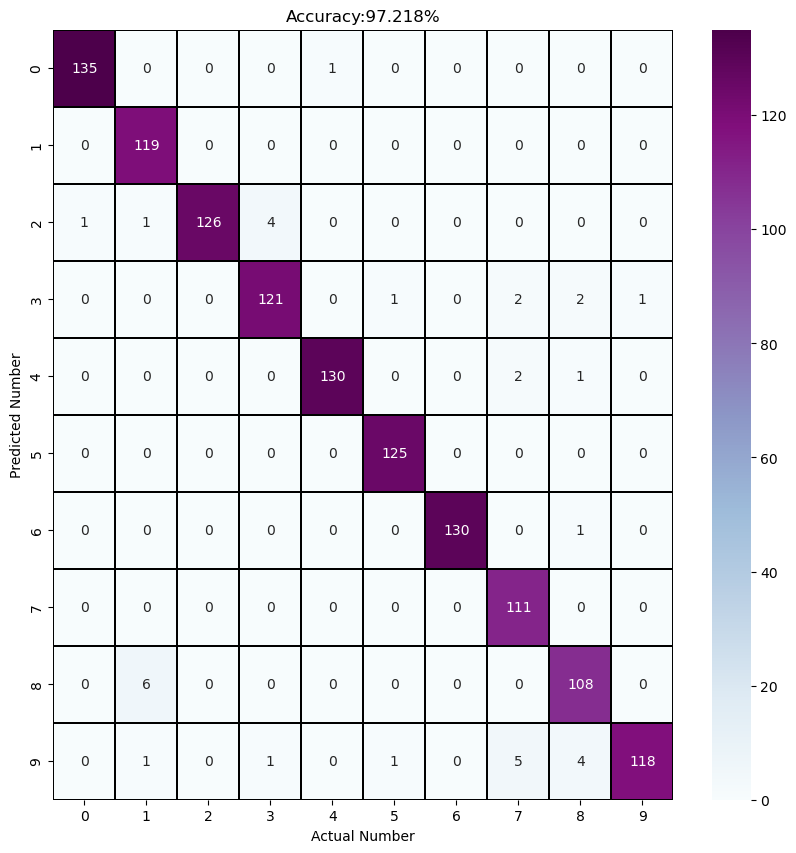

In [210]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,cmap=plt.cm.BuPu,linewidths=0.3,linecolor="black",annot=True,fmt="d")
plt.xlabel("Actual Number")
plt.ylabel("Predicted Number")
plt.title(f"Accuracy:{round(score,3)}%")